In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
# convet y to numerical values 0 if Dropout 1 if Enrolled 2 if Graduate in Y df
Y = y.replace({'Dropout': 0, 'Enrolled': 2, 'Graduate': 1})
print(Y.value_counts())
# print shape of X and Y
print(X.shape)
print(Y.shape)

data = pd.concat([X, Y], axis=1)
# delete the rows with target value enrolled = 2
data = data[data['Target'] != 2]
# split the data into train and test
X = data.drop('Target', axis=1)
Y = data['Target']

# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
print(predict_students_dropout_and_academic_success.variables) 
#print the name of the columns
print(X.columns)

Target
1         2209
0         1421
2          794
Name: count, dtype: int64
(4424, 36)
(4424, 1)
{'uci_id': 697, 'name': "Predict students' dropout and academic success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classif

In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

def perform(y_pred, y_test):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

In [3]:

def train_sub_model(test_size=0.2, random_state=42, keep_list=X.columns):
    X_f = X[keep_list]
    scaler = StandardScaler()
    scaler.fit(X_f)
    X_f = scaler.transform(X_f)
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X_f, Y, test_size=test_size, random_state=random_state)

    logisticRegr = LogisticRegression()
    logisticRegr.fit(X_train, Y_train)

    y_pred = logisticRegr.predict(X_test)
    #output 1 data where the prediction is one transogrmed back to original scale
    x_true_pred = scaler.inverse_transform(X_test[y_pred==1])

    
    l = []
    l.append(x_true_pred[0])

    perform(y_pred, Y_test)
    return logisticRegr, scaler, l

# First Model

Prepare the training data for this first model:

## Selected Columns
- Age at enrollment
- Previous qualification (grade)
- Admission grade

## Name of the Model
**Most Basic Features**

Precision :  0.696969696969697
Recall :  0.696969696969697
Accuracy :  0.696969696969697
F1 Score :  0.696969696969697

 [[102 175]
 [ 45 404]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.69      0.37      0.48       277
           1       0.70      0.90      0.79       449

    accuracy                           0.70       726
   macro avg       0.70      0.63      0.63       726
weighted avg       0.70      0.70      0.67       726

******************************************************

[1]


c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


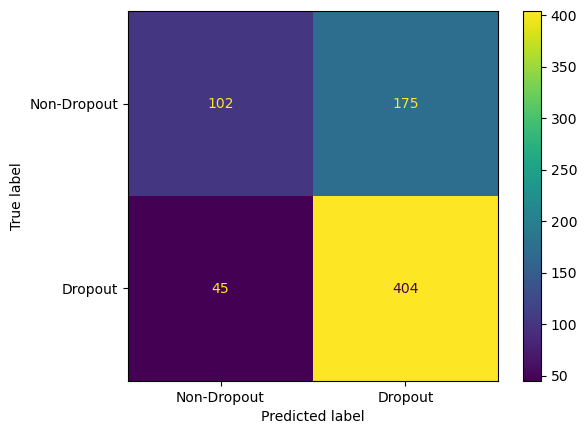

In [4]:
#create a keep list with - Age at enrollment Previous qualification (grade)  Admission grade 
keep_list = ['Age at enrollment', 'Previous qualification (grade)', 'Admission grade']
# train the model with the keep list
model_1,scaler1, pred=train_sub_model(keep_list=keep_list)
print(model_1.predict(scaler1.transform(pred)))




# Second Model

Prepare the training data for this first model:

## Selected Columns
Age at enrollment
Previous qualification (grade)
Admission grade
Nacionality
Gender

## Name of the Model
**Basic Features**

Precision :  0.6942148760330579
Recall :  0.6942148760330579
Accuracy :  0.6942148760330579
F1 Score :  0.6942148760330579

 [[137 140]
 [ 82 367]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.63      0.49      0.55       277
           1       0.72      0.82      0.77       449

    accuracy                           0.69       726
   macro avg       0.67      0.66      0.66       726
weighted avg       0.69      0.69      0.69       726

******************************************************

[1]


c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


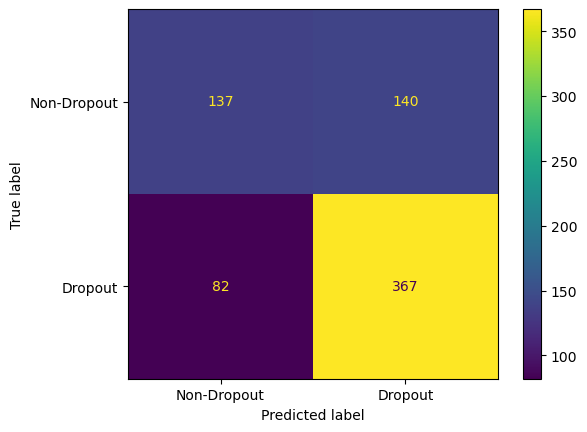

In [5]:
#create a keep list with makdown list
keep_list = ['Age at enrollment','Previous qualification (grade)','Admission grade','Nacionality','Gender']
# train the model with the keep list
model_2,scaler2,pred=train_sub_model(keep_list=keep_list)
print(model_2.predict(scaler2.transform(pred)))

# Third Model

Prepare the training data for this first model:

## Selected Columns
Age at enrollment
Previous qualification (grade)
Admission grade
Nacionality
Gender
Application mode
Educational special needs
Daytime/evening attendance
Course


## Name of the Model
**Basic with academic features**

Precision :  0.696969696969697


c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Recall :  0.696969696969697
Accuracy :  0.696969696969697
F1 Score :  0.696969696969697

 [[140 137]
 [ 83 366]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.63      0.51      0.56       277
           1       0.73      0.82      0.77       449

    accuracy                           0.70       726
   macro avg       0.68      0.66      0.66       726
weighted avg       0.69      0.70      0.69       726

******************************************************

[1]


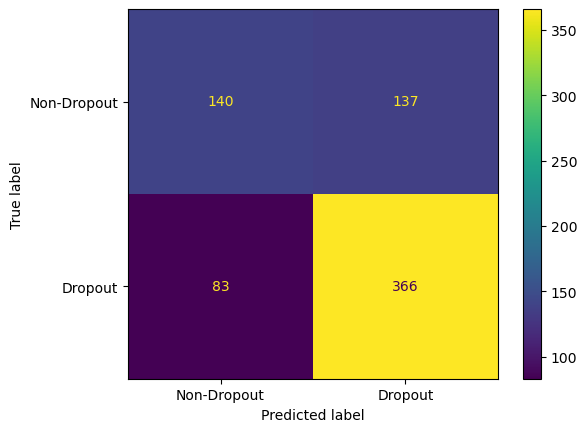

In [6]:
#create a keep list with makdown list
keep_list = ['Age at enrollment','Previous qualification (grade)','Admission grade','Nacionality','Gender','Application mode','Educational special needs','Daytime/evening attendance','Course']
# train the model with the keep list
model_3,scaler3,pred=train_sub_model(keep_list=keep_list)
print(model_3.predict(scaler3.transform(pred)))

# Fourth Model

Prepare the training data for this first model:

## Selected Columns
Age at enrollment

Previous qualification (grade)
Admission grade
Nacionality
Gender
Debtor
Tuition fees up to date
Scholarship holder
GDP


## Name of the Model
**basic with financial features**

c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Precision :  0.7589531680440771
Recall :  0.7589531680440771
Accuracy :  0.7589531680440771
F1 Score :  0.7589531680440771

 [[143 134]
 [ 41 408]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.78      0.52      0.62       277
           1       0.75      0.91      0.82       449

    accuracy                           0.76       726
   macro avg       0.76      0.71      0.72       726
weighted avg       0.76      0.76      0.75       726

******************************************************

[1]


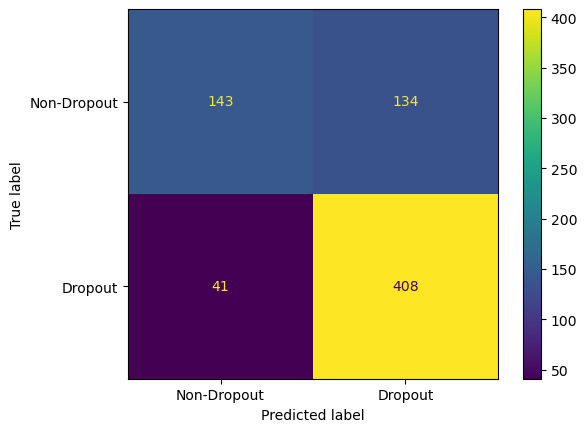

In [7]:
#create a keep list with makdown list
keep_list= [
    "Age at enrollment",
    "Previous qualification (grade)",
    "Admission grade",
    "Nacionality",
    "Gender",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "GDP"
]
# train the model with the keep list
model_4,scaler4,pred=train_sub_model(keep_list=keep_list)
print(model_4.predict(scaler4.transform(pred)))

# Fifth Model

Prepare the training data for this first model:

## Selected Columns
Age at enrollment

Age at enrollment
Previous qualification (grade)
Admission grade
Nacionality
Gender
Application mode
Educational special needs
Daytime/evening attendance
Course
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)


## Name of the Model
**basic with full academic**

c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Precision :  0.8898071625344353
Recall :  0.8898071625344353
Accuracy :  0.8898071625344353
F1 Score :  0.8898071625344353

 [[227  50]
 [ 30 419]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       277
           1       0.89      0.93      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726

******************************************************

[1]


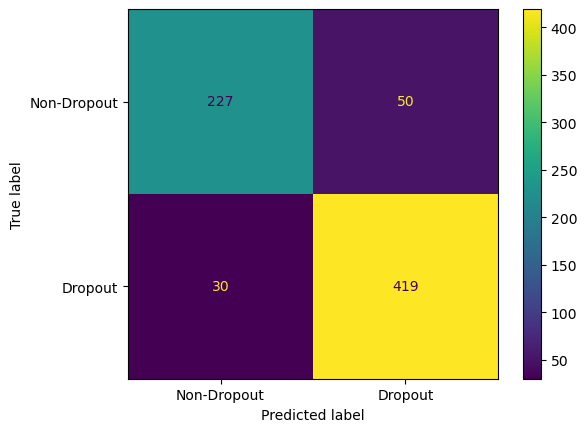

In [8]:
keep_list = [
    "Age at enrollment",
    "Previous qualification (grade)",
    "Admission grade",
    "Nacionality",
    "Gender",
    "Application mode",
    "Educational special needs",
    "Daytime/evening attendance",
    "Course",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)"
]
# train the model with the keep list
model_5,scaler5,pred=train_sub_model(keep_list=keep_list)
print(model_5.predict(scaler5.transform(pred)))



# Sixth Model

Prepare the training data for this first model:

## Selected Columns
Age at enrollment
Previous qualification (grade)
Admission grade
Nacionality
Gender
Debtor
Tuition fees up to date
Scholarship holder
GDP
Application mode
Educational special needs
Daytime/evening attendance
Course
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)

## Name of the Model
**basic with financial and full academic**

Precision :  0.9022038567493113
Recall :  0.9022038567493113
Accuracy :  0.9022038567493113
F1 Score :  0.9022038567493113

 [[231  46]
 [ 25 424]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       277
           1       0.90      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726

******************************************************



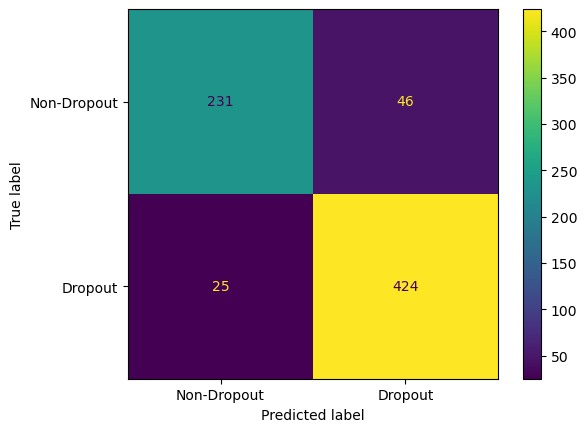

In [9]:
keep_list = [
    "Age at enrollment",
    "Previous qualification (grade)",
    "Admission grade",
    "Nacionality",
    "Gender",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "GDP",
    "Application mode",
    "Educational special needs",
    "Daytime/evening attendance",
    "Course",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)"
]
# train the model with the keep list
model_6,scaler6,pred=train_sub_model(keep_list=keep_list)



# Seventh Model

Prepare the training data for this first model:

## Selected Columns
every feature

## Name of the Model
**full model**

Precision :  0.9104683195592287
Recall :  0.9104683195592287
Accuracy :  0.9104683195592287
F1 Score :  0.9104683195592287

 [[233  44]
 [ 21 428]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       277
           1       0.91      0.95      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726

******************************************************

[array([ 1.00000000e+00,  1.70000000e+01,  1.00000000e+00,  9.14700000e+03,
        1.00000000e+00,  1.00000000e+00,  1.18000000e+02,  1.00000000e+00,
        1.90000000e+01,  1.90000000e+01,  9.00000000e+00,  9.00000000e+00,
        1.22200000e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000

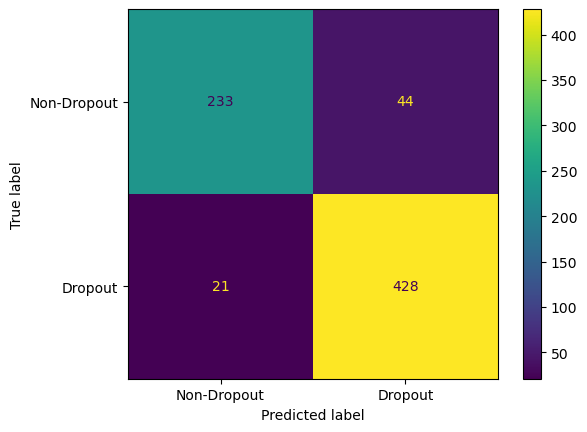

In [10]:
model_7,scaler7,pred=train_sub_model()
print(pred)



In [12]:
#save the model with pickle
import pickle
pickle.dump(model_7, open('models/model_7.pkl','wb'))
pickle.dump(scaler7, open('models/scaler_7.pkl','wb'))
pickle.dump(X.columns.tolist(), open('models/features_7.pkl','wb'))